# 3. Decarbonization of the US economy: the role of natural gas

- **Dataset(s) to be used:** i) CO2 emissions estimates from the **[UN](https://data.un.org/_Docs/SYB/CSV/SYB67_310_202411_Carbon%20Dioxide%20Emission%20Estimates.csv)**; ii) Emissions from energy consumption by source **[US Energy Administration](https://www.eia.gov/totalenergy/data/browser/csv.php?tbl=T11.01)**
- **Analysis question:** Has natural gas help to decarbonize the US economy?
- **Columns that will (likely) be used from the UN dataset:**
  - [Year]
  - [Region/Country/Area]
  - [Value]
- (If you're using multiple datasets) **Columns to be used to merge/join them:**
  - [Dataset 1] [country name] & [Year]
  - [Dataset 2] [country name] & [Year]
- **Hypothesis**: Natural gas has played a significant role in the reduction of the CO2 emissions in the US because it is a sustitute for coal.
- **Site URL:** [URL from Publish section](https://programing.readthedocs.io/en/latest/)

In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"


In [2]:
import pandas as pd
import plotly.express as px

## 3.1. The US CO2 emissions in the world context

In [3]:

global_CO2=pd.read_csv('SYB67_310_202411_Carbon Dioxide Emission Estimates.csv', skiprows=1)
global_CO2

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1975,Emissions (thousand metric tons of carbon diox...,"16,042,405",NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",1985,Emissions (thousand metric tons of carbon diox...,"19,348,135",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2005,Emissions (thousand metric tons of carbon diox...,"26,638,238",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,Emissions (thousand metric tons of carbon diox...,"30,044,215",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2015,Emissions (thousand metric tons of carbon diox...,"31,468,477",NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
3439,716,Zimbabwe,2010,Emissions per capita (Kilograms of carbon diox...,0.7,NaN,"United Nations Statistics Division, New York, ..."
3440,716,Zimbabwe,2015,Emissions per capita (Kilograms of carbon diox...,0.8,NaN,"United Nations Statistics Division, New York, ..."
3441,716,Zimbabwe,2019,Emissions per capita (Kilograms of carbon diox...,0.7,NaN,"United Nations Statistics Division, New York, ..."
3442,716,Zimbabwe,2020,Emissions per capita (Kilograms of carbon diox...,0.5,NaN,"United Nations Statistics Division, New York, ..."


In [4]:
#Adjusting the name of the columns
global_CO2=global_CO2.rename(columns={'Unnamed: 1':'country name'})
global_CO2=global_CO2.rename(columns={'Region/Country/Area	':'Region/Country/Area'})
global_CO2.head()


,Region/Country/Area,country name,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1975,Emissions (thousand metric tons of carbon diox...,"16,042,405",NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",1985,Emissions (thousand metric tons of carbon diox...,"19,348,135",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2005,Emissions (thousand metric tons of carbon diox...,"26,638,238",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,Emissions (thousand metric tons of carbon diox...,"30,044,215",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2015,Emissions (thousand metric tons of carbon diox...,"31,468,477",NaN,"United Nations Statistics Division, New York, ..."


In [5]:
global_CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  3444 non-null   int64 
 1   country name         3444 non-null   object
 2   Year                 3444 non-null   int64 
 3   Series               3444 non-null   object
 4   Value                3444 non-null   object
 5   Footnotes            958 non-null    object
 6   Source               3444 non-null   object
dtypes: int64(2), object(5)
memory usage: 188.5+ KB


In [6]:

global_CO2['Value'] = global_CO2['Value'].str.replace(',', '').astype(float)

global_CO2_reshaped=global_CO2.pivot_table(
    index=['Region/Country/Area','country name','Year','Source'], 
    columns='Series', 
    values='Value'
)
global_CO2_reshaped=global_CO2_reshaped.reset_index()
global_CO2_reshaped


Series,Region/Country/Area,country name,Year,Source,Emissions (thousand metric tons of carbon dioxide),Emissions per capita (Kilograms of carbon dioxide)
0,1,"Total, all countries or areas",1975,"United Nations Statistics Division, New York, ...",16042405.0,3.9
1,1,"Total, all countries or areas",1985,"United Nations Statistics Division, New York, ...",19348135.0,4.0
2,1,"Total, all countries or areas",2005,"United Nations Statistics Division, New York, ...",26638238.0,4.1
3,1,"Total, all countries or areas",2010,"United Nations Statistics Division, New York, ...",30044215.0,4.3
4,1,"Total, all countries or areas",2015,"United Nations Statistics Division, New York, ...",31468477.0,4.2
...,...,...,...,...,...,...
1717,894,Zambia,2010,"United Nations Statistics Division, New York, ...",2759.0,0.2
1718,894,Zambia,2015,"United Nations Statistics Division, New York, ...",4484.0,0.3
1719,894,Zambia,2019,"United Nations Statistics Division, New York, ...",7015.0,0.4
1720,894,Zambia,2020,"United Nations Statistics Division, New York, ...",7314.0,0.4


In [7]:
global_CO2_reshaped['country name'].unique()

array(['Total, all countries or areas', 'Africa', 'North America',
       'Afghanistan', 'South America', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Azerbaijan', 'Argentina', 'Australia', 'Austria', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Armenia', 'Barbados', 'Belgium',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Belize',
       'Solomon Islands', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Myanmar', 'Burundi', 'Belarus', 'Cambodia',
       'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Asia', 'Sri Lanka', 'Chad', 'Europe',
       'Chile', 'China', 'Colombia', 'Comoros', 'Mayotte', 'Congo',
       'Dem. Rep. of the Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Benin', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       '

In [8]:
global_CO2_reshaped=global_CO2_reshaped[
    (global_CO2_reshaped['country name']=='United States of America') |
    (global_CO2_reshaped['country name']=='Total, all countries or areas')
]
global_CO2_reshaped=global_CO2_reshaped.drop('Emissions per capita (Kilograms of carbon dioxide)', axis=1)
global_CO2_reshaped

Series,Region/Country/Area,country name,Year,Source,Emissions (thousand metric tons of carbon dioxide)
0,1,"Total, all countries or areas",1975,"United Nations Statistics Division, New York, ...",16042405.0
1,1,"Total, all countries or areas",1985,"United Nations Statistics Division, New York, ...",19348135.0
2,1,"Total, all countries or areas",2005,"United Nations Statistics Division, New York, ...",26638238.0
3,1,"Total, all countries or areas",2010,"United Nations Statistics Division, New York, ...",30044215.0
4,1,"Total, all countries or areas",2015,"United Nations Statistics Division, New York, ...",31468477.0
5,1,"Total, all countries or areas",2019,"United Nations Statistics Division, New York, ...",32852354.0
6,1,"Total, all countries or areas",2020,"United Nations Statistics Division, New York, ...",31239043.0
7,1,"Total, all countries or areas",2021,"United Nations Statistics Division, New York, ...",33147028.0
1656,840,United States of America,1975,"United Nations Statistics Division, New York, ...",4448307.0
1657,840,United States of America,1985,"United Nations Statistics Division, New York, ...",4547755.0


In [9]:
global_CO2_reshaped['country name'].unique()

array(['Total, all countries or areas', 'United States of America'],
      dtype=object)

In [10]:
global_CO2_reshaped.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Region/Country/Area                                 16 non-null     int64  
 1   country name                                        16 non-null     object 
 2   Year                                                16 non-null     int64  
 3   Source                                              16 non-null     object 
 4   Emissions (thousand metric tons of carbon dioxide)  16 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 768.0+ bytes


In [11]:
# It is easy to work with billions

global_CO2_reshaped['Emissions (billion tons of CO2e)']=global_CO2_reshaped['Emissions (thousand metric tons of carbon dioxide)']/1000000


#Percentage of the global

# Filter for rows where 'country name' is 'Total, all countries or areas'
total_emissions_by_year = global_CO2_reshaped[
    global_CO2_reshaped['country name'] == 'Total, all countries or areas'
][['Year', 'Emissions (billion tons of CO2e)']]

# Rename for clarity
total_emissions_by_year = total_emissions_by_year.rename(
    columns={'Emissions (billion tons of CO2e)': 'Total World Emissions'}
)

# Map the total emissions for each year to the main DataFrame
global_CO2_reshaped['Total World Emissions'] = global_CO2_reshaped['Year'].map(
    total_emissions_by_year.set_index('Year')['Total World Emissions']
)

global_CO2_reshaped['Emissions %total'] = (
    global_CO2_reshaped['Emissions (billion tons of CO2e)'] / global_CO2_reshaped['Total World Emissions'] * 100
)


# Display the updated DataFrame
global_CO2_reshaped


Series,Region/Country/Area,country name,Year,Source,Emissions (thousand metric tons of carbon dioxide),Emissions (billion tons of CO2e),Total World Emissions,Emissions %total
0,1,"Total, all countries or areas",1975,"United Nations Statistics Division, New York, ...",16042405.0,16.042405,16.042405,100.000000
1,1,"Total, all countries or areas",1985,"United Nations Statistics Division, New York, ...",19348135.0,19.348135,19.348135,100.000000
2,1,"Total, all countries or areas",2005,"United Nations Statistics Division, New York, ...",26638238.0,26.638238,26.638238,100.000000
3,1,"Total, all countries or areas",2010,"United Nations Statistics Division, New York, ...",30044215.0,30.044215,30.044215,100.000000
4,1,"Total, all countries or areas",2015,"United Nations Statistics Division, New York, ...",31468477.0,31.468477,31.468477,100.000000
5,1,"Total, all countries or areas",2019,"United Nations Statistics Division, New York, ...",32852354.0,32.852354,32.852354,100.000000
6,1,"Total, all countries or areas",2020,"United Nations Statistics Division, New York, ...",31239043.0,31.239043,31.239043,100.000000
7,1,"Total, all countries or areas",2021,"United Nations Statistics Division, New York, ...",33147028.0,33.147028,33.147028,100.000000
1656,840,United States of America,1975,"United Nations Statistics Division, New York, ...",4448307.0,4.448307,16.042405,27.728430
1657,840,United States of America,1985,"United Nations Statistics Division, New York, ...",4547755.0,4.547755,19.348135,23.504875


In [12]:
#

CO2_US=global_CO2_reshaped=global_CO2_reshaped[
    (global_CO2_reshaped['country name']=='United States of America')
]


fig = px.line(
    CO2_US,
    x="Year",
    y="Emissions (billion tons of CO2e)",
    color="country name",
    title="Graph 1. Total CO2 emissions in the US"
)

# Update the y-axis range
fig.update_yaxes(range=[3, 6.5])  # Set the y-axis range

fig.show()

In [13]:
CO2_US_filtered= CO2_US[CO2_US['Year'].notna() & CO2_US['Emissions %total'].notna()].reset_index()

CO2_US_filtered = CO2_US_filtered[CO2_US_filtered['Year'].isin([1975, 1985, 2005, 2010, 2015, 2019, 2020, 2021])]


In [14]:

fig = px.bar(
    CO2_US_filtered,
    x='Year',
    y="Emissions %total",
    color="country name",
    title="Graph 2. The US share in total CO2e emissions by year",
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color scheme
)

# Specify the years to display on the x-axis
fig.update_xaxes(
    tickvals=[1975, 1985, 2005, 2010, 2015, 2019, 2020, 2021],  # Only show these years
    title="Year",
    type='category'  # Use category type to remove gaps
)


# Add text to the bars
fig.update_traces(texttemplate='%{y:.1f}%', textposition='outside')

# Customize the y-axis range
fig.update_yaxes(title="Emissions (% of total)", range=[0, 40])

# Show the plot
fig.show()


## 3.2. The importance of the energy-related emissions 

In [15]:
Energy_CO2_emissions_fuel=pd.read_csv('MER_T11_01.csv')

In [16]:
Energy_CO2_emissions_fuel

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CKTCEUS,197301,109.559,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
1,CKTCEUS,197302,98.839,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
2,CKTCEUS,197303,98.488,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
3,CKTCEUS,197304,94.155,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
4,CKTCEUS,197305,95.429,1,"Coal, Including Coal Coke Net Imports, CO2 Emi...",Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...,...
9389,TETCEUS,202404,358.742,14,Total Energy CO2 Emissions,Million Metric Tons of Carbon Dioxide
9390,TETCEUS,202405,374.664,14,Total Energy CO2 Emissions,Million Metric Tons of Carbon Dioxide
9391,TETCEUS,202406,381.141,14,Total Energy CO2 Emissions,Million Metric Tons of Carbon Dioxide
9392,TETCEUS,202407,421.309,14,Total Energy CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [17]:
Energy_CO2_emissions_fuel['Value'] = Energy_CO2_emissions_fuel['Value'].astype(float)

Energy_CO2_emissions_fuel_reshaped=Energy_CO2_emissions_fuel.pivot_table(
    index=['YYYYMM','Unit'], 
    columns='Description', 
    values='Value'
)
Energy_CO2_emissions_fuel_reshaped=Energy_CO2_emissions_fuel_reshaped.reset_index()
Energy_CO2_emissions_fuel_reshaped.tail(10)

Description,YYYYMM,Unit,Aviation Gasoline CO2 Emissions,"Coal, Including Coal Coke Net Imports, CO2 Emissions","Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions",Hydrocarbon Gas Liquids CO2 Emissions,Jet Fuel CO2 Emissions,Kerosene CO2 Emissions,Lubricants CO2 Emissions,"Motor Gasoline, Excluding Ethanol, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Other Petroleum Products CO2 Emissions,Petroleum Coke CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Residual Fuel Oil CO2 Emissions,Total Energy CO2 Emissions
661,202312,Million Metric Tons of Carbon Dioxide,0.093,64.058,47.670,10.688,21.180,0.245,0.270,90.359,172.816,9.148,3.124,187.543,4.767,425.051
662,202313,Million Metric Tons of Carbon Dioxide,1.464,777.318,602.141,96.702,247.148,1.601,6.806,1081.443,1759.732,109.867,56.552,2250.870,47.145,4795.382
663,202401,Million Metric Tons of Carbon Dioxide,0.076,83.157,50.654,11.634,19.504,0.201,0.593,84.737,200.235,8.667,3.912,183.921,3.943,467.945
664,202402,Million Metric Tons of Carbon Dioxide,0.147,53.409,47.990,9.386,18.576,0.108,0.479,82.516,160.487,8.018,2.425,173.260,3.613,387.747
665,202403,Million Metric Tons of Carbon Dioxide,0.099,46.745,48.030,8.814,20.960,0.097,0.528,91.343,150.962,8.804,2.441,185.700,4.583,384.038
666,202404,Million Metric Tons of Carbon Dioxide,0.143,44.492,47.934,7.097,20.992,0.156,0.748,88.126,128.948,8.474,6.599,184.691,4.421,358.742
667,202405,Million Metric Tons of Carbon Dioxide,0.124,53.461,49.333,6.826,22.449,0.157,0.521,96.313,125.599,9.492,5.439,194.972,4.319,374.664
668,202406,Million Metric Tons of Carbon Dioxide,0.179,67.905,45.351,6.169,21.013,0.111,0.582,90.783,130.996,9.414,3.971,181.628,4.057,381.141
669,202407,Million Metric Tons of Carbon Dioxide,0.178,78.975,48.186,5.919,23.256,0.022,0.617,95.473,148.096,9.475,6.190,193.606,4.292,421.309
670,202408,Million Metric Tons of Carbon Dioxide,0.147,76.968,50.595,6.387,22.712,0.090,0.527,95.065,146.685,9.552,2.059,191.351,4.217,415.636


In [18]:
Energy_CO2_emissions_fuel_reshaped['Year'] = Energy_CO2_emissions_fuel_reshaped['YYYYMM'].astype(str).str[:4]  # Extract the first 4 digits as year
Energy_CO2_emissions_fuel_reshaped['Month'] = Energy_CO2_emissions_fuel_reshaped['YYYYMM'].astype(str).str[-2:] # Extract the last 2 digits as month
Energy_CO2_emissions_fuel_reshaped['Month'].unique()

# Group by year and sum the emissions
#US_CO2_emissions_year = Energy_CO2_emissions_fuel_reshaped.groupby('Year').sum().reset_index()
#US_CO2_emissions_year

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13'], dtype=object)

**By studying the database I discovered that the month 13 corresponds to the total of the year**

In [19]:
Energy_CO2_emissions_fuel_reshaped

Description,YYYYMM,Unit,Aviation Gasoline CO2 Emissions,"Coal, Including Coal Coke Net Imports, CO2 Emissions","Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions",Hydrocarbon Gas Liquids CO2 Emissions,Jet Fuel CO2 Emissions,Kerosene CO2 Emissions,Lubricants CO2 Emissions,"Motor Gasoline, Excluding Ethanol, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Other Petroleum Products CO2 Emissions,Petroleum Coke CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Residual Fuel Oil CO2 Emissions,Total Energy CO2 Emissions,Year,Month
0,197301,Million Metric Tons of Carbon Dioxide,0.428,109.559,55.157,10.464,13.742,5.222,1.037,70.937,125.599,8.754,4.850,218.962,48.370,454.121,1973,01
1,197302,Million Metric Tons of Carbon Dioxide,0.431,98.839,51.771,8.849,12.193,4.475,1.025,67.412,113.788,7.674,3.992,202.509,44.686,415.136,1973,02
2,197303,Million Metric Tons of Carbon Dioxide,0.459,98.488,44.460,6.688,12.293,2.582,1.105,75.521,107.736,8.659,4.357,201.234,45.111,407.459,1973,03
3,197304,Million Metric Tons of Carbon Dioxide,0.446,94.155,33.973,5.793,12.112,2.031,0.979,73.404,97.871,8.230,4.179,176.211,35.063,368.237,1973,04
4,197305,Million Metric Tons of Carbon Dioxide,0.549,95.429,35.591,5.489,13.756,1.702,1.156,80.093,92.070,8.688,4.645,188.558,36.889,376.057,1973,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,202404,Million Metric Tons of Carbon Dioxide,0.143,44.492,47.934,7.097,20.992,0.156,0.748,88.126,128.948,8.474,6.599,184.691,4.421,358.742,2024,04
667,202405,Million Metric Tons of Carbon Dioxide,0.124,53.461,49.333,6.826,22.449,0.157,0.521,96.313,125.599,9.492,5.439,194.972,4.319,374.664,2024,05
668,202406,Million Metric Tons of Carbon Dioxide,0.179,67.905,45.351,6.169,21.013,0.111,0.582,90.783,130.996,9.414,3.971,181.628,4.057,381.141,2024,06
669,202407,Million Metric Tons of Carbon Dioxide,0.178,78.975,48.186,5.919,23.256,0.022,0.617,95.473,148.096,9.475,6.190,193.606,4.292,421.309,2024,07


In [20]:
#print(Energy_CO2_emissions_fuel_reshaped['Month'].dtype)

Energy_CO2_emissions_fuel_reshaped=Energy_CO2_emissions_fuel_reshaped[Energy_CO2_emissions_fuel_reshaped['Month']=='13']
Energy_CO2_emissions_fuel_reshaped.head()

Description,YYYYMM,Unit,Aviation Gasoline CO2 Emissions,"Coal, Including Coal Coke Net Imports, CO2 Emissions","Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions",Hydrocarbon Gas Liquids CO2 Emissions,Jet Fuel CO2 Emissions,Kerosene CO2 Emissions,Lubricants CO2 Emissions,"Motor Gasoline, Excluding Ethanol, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Other Petroleum Products CO2 Emissions,Petroleum Coke CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Residual Fuel Oil CO2 Emissions,Total Energy CO2 Emissions,Year,Month
12,197313,Million Metric Tons of Carbon Dioxide,5.771,1220.714,485.041,79.540,154.162,32.747,13.290,911.241,1175.252,102.153,55.137,2325.281,486.200,4721.247,1973,13
25,197413,Million Metric Tons of Carbon Dioxide,5.660,1199.352,462.397,76.569,144.427,26.704,12.728,892.546,1134.594,101.288,50.473,2227.390,454.598,4561.336,1974,13
38,197513,Million Metric Tons of Carbon Dioxide,4.911,1195.102,447.176,72.841,145.616,24.064,11.268,911.268,1042.853,96.927,52.102,2190.270,424.097,4428.225,1975,13
51,197613,Million Metric Tons of Carbon Dioxide,4.664,1281.249,492.737,75.039,144.116,25.695,12.518,955.258,1063.161,105.092,51.548,2350.496,483.828,4694.906,1976,13
64,197713,Million Metric Tons of Carbon Dioxide,4.863,1315.802,525.595,73.753,151.264,26.542,13.097,979.835,1041.406,117.689,56.553,2478.228,529.037,4835.437,1977,13


In [21]:

Energy_CO2_emissions_fuel_reshaped['country name']='United States of America'
Energy_CO2_emissions_fuel_reshaped.head(5)


/var/folders/7m/g81vb7mn1psfxqpqbrwl_lmw0000gn/T/ipykernel_50674/3087230447.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Description,YYYYMM,Unit,Aviation Gasoline CO2 Emissions,"Coal, Including Coal Coke Net Imports, CO2 Emissions","Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions",Hydrocarbon Gas Liquids CO2 Emissions,Jet Fuel CO2 Emissions,Kerosene CO2 Emissions,Lubricants CO2 Emissions,"Motor Gasoline, Excluding Ethanol, CO2 Emissions","Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions",Other Petroleum Products CO2 Emissions,Petroleum Coke CO2 Emissions,"Petroleum, Excluding Biofuels, CO2 Emissions",Residual Fuel Oil CO2 Emissions,Total Energy CO2 Emissions,Year,Month,country name
12,197313,Million Metric Tons of Carbon Dioxide,5.771,1220.714,485.041,79.540,154.162,32.747,13.290,911.241,1175.252,102.153,55.137,2325.281,486.200,4721.247,1973,13,United States of America
25,197413,Million Metric Tons of Carbon Dioxide,5.660,1199.352,462.397,76.569,144.427,26.704,12.728,892.546,1134.594,101.288,50.473,2227.390,454.598,4561.336,1974,13,United States of America
38,197513,Million Metric Tons of Carbon Dioxide,4.911,1195.102,447.176,72.841,145.616,24.064,11.268,911.268,1042.853,96.927,52.102,2190.270,424.097,4428.225,1975,13,United States of America
51,197613,Million Metric Tons of Carbon Dioxide,4.664,1281.249,492.737,75.039,144.116,25.695,12.518,955.258,1063.161,105.092,51.548,2350.496,483.828,4694.906,1976,13,United States of America
64,197713,Million Metric Tons of Carbon Dioxide,4.863,1315.802,525.595,73.753,151.264,26.542,13.097,979.835,1041.406,117.689,56.553,2478.228,529.037,4835.437,1977,13,United States of America


In [22]:

# Select specific columns
US_CO2_emissions_year_filtered = Energy_CO2_emissions_fuel_reshaped[['Year', 'country name', 'Total Energy CO2 Emissions']]

# Create a new column with emissions in billion tons
US_CO2_emissions_year_filtered['Total Energy CO2 Emissions (billion tons of CO2e)'] = (
    US_CO2_emissions_year_filtered['Total Energy CO2 Emissions'] / 1000
)

# Drop the original 'Total Energy CO2 Emissions' column
US_CO2_emissions_year_filtered = US_CO2_emissions_year_filtered.drop('Total Energy CO2 Emissions', axis=1)

# Display the filtered DataFrame
US_CO2_emissions_year_filtered.head()


/var/folders/7m/g81vb7mn1psfxqpqbrwl_lmw0000gn/T/ipykernel_50674/4104714227.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Description,Year,country name,Total Energy CO2 Emissions (billion tons of CO2e)
12,1973,United States of America,4.721247
25,1974,United States of America,4.561336
38,1975,United States of America,4.428225
51,1976,United States of America,4.694906
64,1977,United States of America,4.835437


**Merge of the datasets**

In [23]:
US_CO2_emissions_year_filtered['Year'] = pd.to_numeric(
    US_CO2_emissions_year_filtered['Year'], errors='coerce'
).astype('Int64')

global_CO2_reshaped['Year'] = pd.to_numeric(
    global_CO2_reshaped['Year'], errors='coerce'
).astype('Int64')


merged_CO2_US=pd.merge(US_CO2_emissions_year_filtered, global_CO2_reshaped, on=['country name', 'Year'], how='right')
merged_CO2_US.head()


/var/folders/7m/g81vb7mn1psfxqpqbrwl_lmw0000gn/T/ipykernel_50674/1623941713.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,country name,Total Energy CO2 Emissions (billion tons of CO2e),Region/Country/Area,Source,Emissions (thousand metric tons of carbon dioxide),Emissions (billion tons of CO2e),Total World Emissions,Emissions %total
0,1975,United States of America,4.428225,840,"United Nations Statistics Division, New York, ...",4448307.0,4.448307,16.042405,27.728430
1,1985,United States of America,4.605714,840,"United Nations Statistics Division, New York, ...",4547755.0,4.547755,19.348135,23.504875
2,2005,United States of America,6.007546,840,"United Nations Statistics Division, New York, ...",5783324.0,5.783324,26.638238,21.710610
3,2010,United States of America,5.593816,840,"United Nations Statistics Division, New York, ...",5364966.0,5.364966,30.044215,17.856902
4,2015,United States of America,5.262200,840,"United Nations Statistics Division, New York, ...",5016486.0,5.016486,31.468477,15.941305


In [24]:
merged_CO2_US = merged_CO2_US.rename(columns={'Emissions (billion tons of CO2e)': 'US total Emissions (billion tons of CO2e)'})
merged_CO2_US = merged_CO2_US.rename(columns={'Total Energy CO2 Emissions (billion tons of CO2e)': 'US Energy CO2 Emissions (billion tons of CO2e)'})

melted_CO2_US= merged_CO2_US.melt(id_vars='Year', value_vars=['US Energy CO2 Emissions (billion tons of CO2e)', 'US total Emissions (billion tons of CO2e)'], 
                  var_name='Emission Type', value_name='Emissions (billion tons of CO2e)')

melted_CO2_US

,Year,Emission Type,Emissions (billion tons of CO2e)
0,1975,US Energy CO2 Emissions (billion tons of CO2e),4.428225
1,1985,US Energy CO2 Emissions (billion tons of CO2e),4.605714
2,2005,US Energy CO2 Emissions (billion tons of CO2e),6.007546
3,2010,US Energy CO2 Emissions (billion tons of CO2e),5.593816
4,2015,US Energy CO2 Emissions (billion tons of CO2e),5.262200
5,2019,US Energy CO2 Emissions (billion tons of CO2e),5.146993
6,2020,US Energy CO2 Emissions (billion tons of CO2e),4.585247
7,2021,US Energy CO2 Emissions (billion tons of CO2e),4.905910
8,1975,US total Emissions (billion tons of CO2e),4.448307
9,1985,US total Emissions (billion tons of CO2e),4.547755


In [25]:

fig = px.line(
    melted_CO2_US,
    x="Year",
    y="Emissions (billion tons of CO2e)",
    color="Emission Type",
    title="Graph 3. Total emissions and energy related emissions in the US"
)


fig.show()

## 3.3. US emissions by type of energy

Now, because we know from Graph 3 that the US CO2 emissions mainly depend on energy-related emissions, we can go back to the dataset that has specific information about the emissions by type of energy.

In [26]:
melted_CO2_energy= Energy_CO2_emissions_fuel_reshaped.melt(id_vars='Year', 
                                  value_vars=[
                                      'Aviation Gasoline CO2 Emissions', 
                                      'Coal, Including Coal Coke Net Imports, CO2 Emissions',
                                      'Distillate Fuel Oil, Excluding Biodiesel, CO2 Emissions',
                                      'Hydrocarbon Gas Liquids CO2 Emissions',
                                      'Jet Fuel CO2 Emissions',
                                      'Kerosene CO2 Emissions',
                                      'Lubricants CO2 Emissions',
                                      'Motor Gasoline, Excluding Ethanol, CO2 Emissions',
                                      'Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions',
                                      'Other Petroleum Products CO2 Emissions',
                                      'Petroleum Coke CO2 Emissions',
                                      'Petroleum, Excluding Biofuels, CO2 Emissions',
                                      'Residual Fuel Oil CO2 Emissions'   
                                  ], 
                                  var_name='Type of Energy', 
                                  value_name='Emissions (million tons of CO2e)'
)

melted_CO2_energy.tail()

,Year,Type of Energy,Emissions (million tons of CO2e)
658,2019,Residual Fuel Oil CO2 Emissions,47.314
659,2020,Residual Fuel Oil CO2 Emissions,35.867
660,2021,Residual Fuel Oil CO2 Emissions,54.065
661,2022,Residual Fuel Oil CO2 Emissions,56.671
662,2023,Residual Fuel Oil CO2 Emissions,47.145


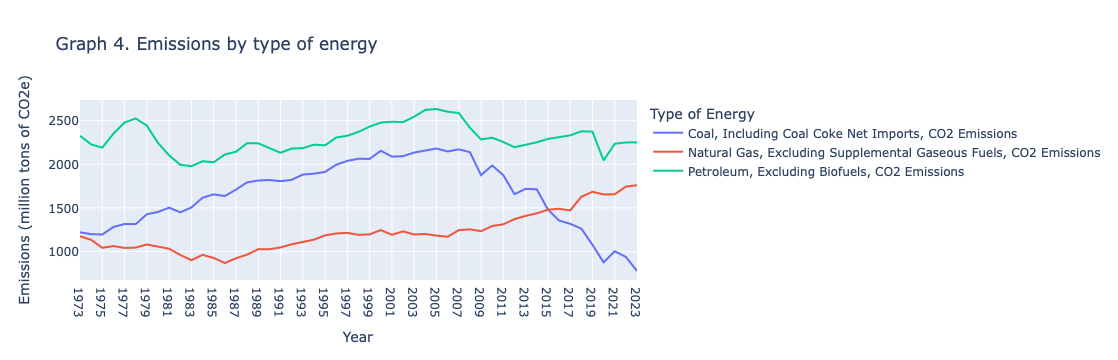

In [27]:

melted_CO2_energy_aggregate=melted_CO2_energy[
(melted_CO2_energy['Type of Energy']=='Coal, Including Coal Coke Net Imports, CO2 Emissions') |
(melted_CO2_energy['Type of Energy']=='Natural Gas, Excluding Supplemental Gaseous Fuels, CO2 Emissions') |
(melted_CO2_energy['Type of Energy']=='Petroleum, Excluding Biofuels, CO2 Emissions')
]



fig = px.line(
    melted_CO2_energy_aggregate,
    x="Year",
    y="Emissions (million tons of CO2e)",
    color="Type of Energy",
    title="Graph 4. Emissions by type of energy"
)


fig.show()

## Final considerations


Section 3.1 shows that total US emissions peaked in 2005 at 5.8. After that, they steadily decreased in absolute and relative terms. Graph 2 shows that the share of US emissions worldwide decreased from almost one-third in the 1970s to about 14% in 2021. The evolution of the emissions relative to the world has to do with the progression of emerging economies, especially China. 

On the other hand, section 3.2 explores the importance of energy-related emissions in the total emissions. Graph 3 demonstrates that energy-related emissions explain most of the evolution of the US total emissions. Therefore, by analyzing the trends in energy consumption, it is possible to understand what explains the recent reduction in the emission level of the economy.

Precisely, section 3.3 focuses on determining the evolution of the emissions by type of energy. Graph 4 shows how the emissions produced by coal consumption, which is explained by its use for electricity production, have dramatically decreased. Simultaneously, the emissions that come from natural gas have significantly increased. Here, we have two phenomena: first, the evolution of renewable energy, and second, the necessity of providing reliability by using sources such as natural gas. 

A continuation of this project should focus on understanding how much of the energy previously produced by coal has been replaced by renewables and how much by natural gas. In any case, it is possible to argue that natural gas, another fossil fuel, has helped to decarbonize the US economy.

